In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

In [2]:
x = sp.Symbol('x')
f = sp.exp(-x**2)
a, b = 0, 1
I = sp.integrate(f, (x, a, b))
exact_value = I.evalf()
print(f"Exact value: {exact_value:.10f}")

Exact value: 0.7468241328


In [3]:
def f(x):
    return np.exp(-x**2)

def rectangle_left(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    return h * np.sum(f(x))
n = 100
left_rect = rectangle_left(f, a, b, n)
print(f"Left: {left_rect:.10f}, error: {abs(exact_value - left_rect):.2e}")

Left: 0.7499786043, error: 3.15e-3


In [4]:
def rectangle_right(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h, b, n)
    return h * np.sum(f(x))

right_rect = rectangle_right(f, a, b, n)
print(f"Right: {right_rect:.10f}, error: {abs(exact_value - right_rect):.2e}")

Right: 0.7436573987, error: 3.17e-3


In [5]:
def rectangle_midpoint(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h/2, b - h/2, n)
    return h * np.sum(f(x))

midpoint_rect = rectangle_midpoint(f, a, b, n)
print(f"Midpoint : {midpoint_rect:.10f}, error : {abs(exact_value - midpoint_rect):.2e}")

Midpoint : 0.7468271985, error : 3.07e-6


In [6]:
def trapezoidal(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

trap = trapezoidal(f, a, b, n)
print(f"Trapezoid : {trap:.10f}, error : {abs(exact_value - trap):.2e}")

Trapezoid : 0.7468180015, error : 6.13e-6


In [7]:
x = np.linspace(a, b, n + 1)
y = np.exp(-x**2)
trap_scipy = integrate.trapezoid(y, x)
print(f"Trapezoid using scipy : {trap_scipy:.10f}, error : {abs(exact_value - trap_scipy):.2e}")

Trapezoid using scipy : 0.7468180015, error : 6.13e-6


In [11]:
def simpson(f, a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    result = y[0] + y[-1]
    result += 4 * np.sum(y[1:-1:2])
    result += 2 * np.sum(y[2:-2:2])
    return (h / 3) * result

simp = simpson(f, a, b, n)
print(f"Simpson : {simp:.10f}, error: {abs(exact_value - simp):.2e}")

Simpson : 0.7468241329, error: 8.17e-11


In [9]:
x = np.linspace(a, b, n + 1)
y = np.exp(-x**2)
simp_scipy = integrate.simpson(y, x)
print(f"Simpson using scipy : {simp_scipy:.10f}, error : {abs(exact_value - simp_scipy):.2e}")

Simpson using scipy : 0.7468241329, error : 8.17e-11


In [13]:
def simpson_38(f, a, b, n):
    if n % 3 != 0:
        n = ((n // 3) + 1) * 3
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    result = y[0] + y[-1]
    for i in range(1, n):
        if i % 3 != 0:
            result += 3 * y[i]
        else:
            result += 2 * y[i]
    return (3 * h / 8) * result

simp_38 = simpson_38(f, a, b, n)
print(f"Simpon's 3/8 : {simp_38:.10f}, error: {abs(exact_value - simp_38):.2e}")

Simpon's 3/8 : 0.7468241330, error: 1.70e-10


In [14]:
def boole(f, a, b, n):
    if n % 4 != 0:
        n = ((n // 4) + 1) * 4
        
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    
    result = 7 * (y[0] + y[-1])
    for i in range(1, n):
        if i % 4 == 0:
            result += 14 * y[i]
        elif i % 2 == 0:
            result += 12 * y[i]
        else:
            result += 32 * y[i]
    return (2 * h / 45) * result
    
boole = boole(f, a, b, n)
print(f"Boole : {boole:.10f}, error : {abs(exact_value - boole):.2e}")

Boole : 0.7468241328, error : 6.00e-15


Exact value: 0.7468241328

| Method             |   Result |   Abs Error |   Rel Error |
|--------------------|----------|-------------|-------------|
| Left Rectangle     | 0.749979 |    0.00315  |    0.00422  |
| Right Rectangle    | 0.74867  |    0.00185  |    0.00247  |
| Midpoint Rectangle | 0.746827 |    3.07e-06 |    4.1e-06  |
| Trapezoidal        | 0.746818 |    6.13e-06 |    8.21e-06 |
| Simpson's 1/3      | 0.746824 |    8.17e-11 |    1.09e-10 |
| Simpson's 3/8      | 0.746824 |    1.7e-10  |    2.28e-10 |
| Boole's Rule       | 0.746824 |    6e-15    |    8.03e-15 |

--------------------------------------------------------------------------------
Plot: Abbsolute Error Comparison (log scale) of Numerical Integration Methods
--------------------------------------------------------------------------------



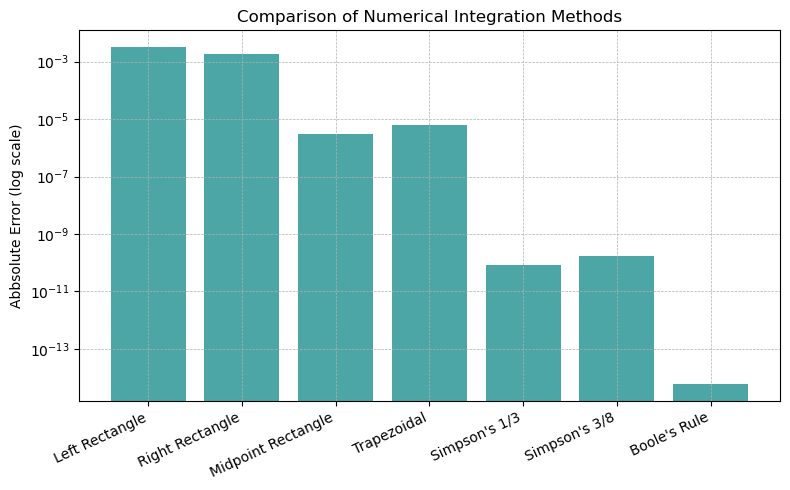

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from tabulate import tabulate

class NumericalIntegrator:

    @staticmethod
    def exact(a, b):
        x = sp.Symbol('x')
        y = sp.exp(-x**2)
        result = sp.integrate(y, (x, a, b))
        return result

    @staticmethod
    def f(x):
        return np.exp(-x**2)

    @staticmethod
    def rectangle_midpoint(f, a, b, n):
        h = (b - a) / n
        x = np.linspace(a + h/2, b - h/2, n)
        return h * np.sum(f(x))

    @staticmethod
    def rectangle_left(f, a, b, n):
        h = (b - a) / n
        x = np.linspace(a, b - h, n)
        return h * np.sum(f(x))

    @staticmethod
    def rectangle_right(f, a, b, n):
        h = (b - a) / n
        x = np.linspace(a - h, b, n)
        return h * np.sum(f(x))

    @staticmethod
    def trapezoidal(f, a, b, n):
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

    @staticmethod
    def simpson(f, a, b, n):
        if n % 2 != 0:
            n += 1
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]) + y[-1])

    @staticmethod
    def simpson_38(f, a, b, n):
        if n % 3 != 0:
            n = ((n // 3) + 1) * 3
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        result = y[0] + y[-1]
        for i in range(1, n):
            if i % 3 == 0:
                result += 2 * y[i]
            else:
                result += 3 * y[i]
        return (3 * h / 8) * result

    @staticmethod
    def boole(f, a, b, n):
        if n % 4 != 0:
            n = ((n // 4) + 1) * 4
        h = (b -  a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        result = 7 * (y[0] + y[-1])
        for i in range(1, n):
            if i % 4 == 0:
                result += 14 * y[i]
            elif i % 2 == 0:
                result += 12 * y[i]
            else:
                result += 32 * y[i]
        return (2 * h / 45) * result

Integrator = NumericalIntegrator()
a, b, n = 0, 1, 100
f = Integrator.f
exact_value = Integrator.exact(a, b).evalf()
print(f"Exact value: {exact_value:.10f}\n")

methods = {
    "Left Rectangle" : Integrator.rectangle_left,
    "Right Rectangle" : Integrator.rectangle_right,
    "Midpoint Rectangle" : Integrator.rectangle_midpoint,
    "Trapezoidal" : Integrator.trapezoidal,
    "Simpson's 1/3" : Integrator.simpson,
    "Simpson's 3/8" : Integrator.simpson_38,
    "Boole's Rule" : Integrator.boole
}

abs_errors = []
table_data = []

for name, method in methods.items():
    result = method(f, a, b, n)
    abs_error = abs(exact_value - result)
    rel_error = abs_error / abs(exact_value)
    abs_errors.append(abs_error)
    table_data.append([name, f"{result:.10f}", f"{abs_error:.2e}", f"{rel_error:.2e}"])

print(tabulate(table_data, headers=["Method", "Result", "Abs Error", "Rel Error"], tablefmt="github"))

print("\n" + "-"*80)
print("Plot: Abbsolute Error Comparison (log scale) of Numerical Integration Methods")
print("-"*80 + "\n")

plt.figure(figsize=(8, 5))
plt.bar(methods.keys(), abs_errors, color='teal', alpha=0.7)
plt.yscale('log')
plt.ylabel('Abbsolute Error (log scale)')
plt.title('Comparison of Numerical Integration Methods')
plt.xticks(rotation=25, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# ===================================
# PINN for Numerical Integration
# ===================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

model = PINN().to(device)

x_colloc = torch.linspace(a, b, 200, dtype=torch.float32, device=device, requires_grad=True).reshape(-1, 1)

x0 = torch.tensor([[a]], dtype=torch.float32, device=device)
y0 = torch.tensor([[0.0]], dtype=torch.float32, device=device)

def pinn_loss():
    I_pred = model(x_colloc)
    dI = torch.autograd.grad(I_pred, x_colloc, grad_outputs=torch.ones_like(I_pred), create_graph=True)[0]
    f_vals = torch.exp(-x_colloc**2)
    f_pde = dI - f_vals
    loss_pde = torch.mean(f_pde**2)
    
    I0 = model(x0)
    loss_ic = torch.mean((I0 - y0)**2)
    
    return loss_pde + loss_ic

optimizer_adam = optim.Adam(model.parameters(), lr=5e-4)

for it in range(10000):
    optimizer_adam.zero_grad()
    loss = pinn_loss()
    loss.backward()
    optimizer_adam.step()
    if it % 1000 == 0:
        print(f'Adam Iter {it}, Loss {loss.item():.3e}')

optimizer_lbfgs = optim.LBFGS(model.parameters(), lr=1.0, max_iter=500, line_search_fn='strong_wolfe')

def closure():
    optimizer_lbfgs.zero_grad()
    loss = pinn_loss()
    loss.backward()
    return loss
optimizer_lbfgs.step(closure)

x_pinn = torch.tensor([[b]], dtype=torch.float32, device=device)
I_pinn = model(x_pinn).detach().cpu().numpy()[0, 0]

print(f"\nPINN Integration: {I_pinn:.10f}, error: {abs(exact_value - I_pinn):.2e}")


In [ ]:
# ===================================
# Comparison Plot: All Methods vs Exact
# ===================================
methods_with_pinn = list(methods.keys()) + ["PINN"]
results_with_pinn = [methods[name](f, a, b, n) for name in methods.keys()] + [I_pinn]
errors_with_pinn = [abs(exact_value - r) for r in results_with_pinn]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(methods_with_pinn, errors_with_pinn, color='teal', alpha=0.7)
plt.yscale('log')
plt.ylabel('Absolute Error (log scale)')
plt.title('Comparison: All Methods vs Exact (PINN included)')
plt.xticks(rotation=25, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
x_plot = torch.linspace(a, b, 200, dtype=torch.float32, device=device).reshape(-1, 1)
I_plot = model(x_plot).detach().cpu().numpy()
x_plot_np = x_plot.detach().cpu().numpy().flatten()
x_exact = np.linspace(a, b, 200)
I_exact = [float(sp.integrate(sp.exp(-sp.Symbol('x')**2), (sp.Symbol('x'), a, xi))) for xi in x_exact]

plt.plot(x_plot_np, I_plot, 'r--', label='PINN', linewidth=2)
plt.plot(x_exact, I_exact, 'k-', label='Exact Integral', linewidth=2)
plt.xlabel('x')
plt.ylabel('I(x) = ∫₀ˣ exp(-t²) dt')
plt.title('PINN vs Exact Integral Function')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
